DESeq2 is a very useful and versatile package for assessing differential gene expression in a dataset. Please feel free to check out the [documentation](https://bioconductor.org/packages/release/bioc/manuals/DESeq2/man/DESeq2.pdf) as well as this quick-start [guide](https://bioc.ism.ac.jp/packages/2.14/bioc/vignettes/DESeq2/inst/doc/beginner.pdf) to find out more about the full power of this package.

Let's begin by loading in DESeq2, as well as some other important packages that we will be using in our analysis. 

In [1]:
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The followin

In [2]:
library("ggplot2")

library("RColorBrewer")

Let's now import our counts matrix. Since we already generated a "clean counts" matrix, let's just import that one:

In [3]:
counts <- read.csv('~/bms_2019/rna_seq/analysis/feature_counts/Mouse_LPS_counts_for_deseq2.csv',
                  header=TRUE, row.names=1)
head(counts)

,mouse_4hr_rep1,mouse_4hr_rep2,mouse_0hr_rep1,mouse_0hr_rep2
,<int>,<int>,<int>,<int>
ENSMUSG00000098104.1,2,13,0,6
ENSMUSG00000103922.1,6,16,6,12
ENSMUSG00000033845.13,267,344,583,1088
ENSMUSG00000102275.1,2,2,13,6
ENSMUSG00000025903.14,532,691,804,994
ENSMUSG00000033813.15,1026,875,1069,994


Let's also import the conditions matrix. We will need both for out differential expression analysis:

In [4]:
col_data <- read.csv('~/bms_2019/rna_seq/analysis/feature_counts/Mouse_LPS_conditions_for_deseq2.csv',
                  header=TRUE, row.names=1)

head(col_data)

,condition
,<fct>
mouse_4hr_rep1,treated
mouse_4hr_rep2,treated
mouse_0hr_rep1,control
mouse_0hr_rep2,control


Let's now make a DESeq Dataset as an object. This will take into account out counts and condition data, as well as experimental design (experimental variable being set as condition):

In [5]:
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = col_data,
                              design = ~ condition)

Let's run DESeq analysis and summarize the results with res:

In [6]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [7]:
res <- results(dds)

In [8]:
res

log2 fold change (MLE): condition treated vs control 
Wald test p-value: condition treated vs control 
DataFrame with 17807 rows and 6 columns
                              baseMean     log2FoldChange             lfcSE
                             <numeric>          <numeric>         <numeric>
ENSMUSG00000098104.1  6.02161464994151   2.25853412252466  2.30853457590841
ENSMUSG00000103922.1  10.5585284694018   1.17493133905489  1.50252823296654
ENSMUSG00000033845.13 504.646717301137 -0.565355336576571 0.411806268979953
ENSMUSG00000102275.1  4.90018940203896  -1.41818381812476  2.11215474511578
ENSMUSG00000025903.14 735.370819959576  0.312768402537624 0.347817300712378
...                                ...                ...               ...
ENSMUSG00000064368.1   85885.897086432  0.615058137525979 0.604808510968308
ENSMUSG00000064369.1  1432.70384444566  0.661700915345814 0.584502339093053
ENSMUSG00000064370.1  294531.589333522  0.579755338811117 0.620273820881185
ENSMUSG00000064371.1 

In [9]:
summary(res)


out of 17807 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1961, 11%
LFC < 0 (down)     : 1380, 7.7%
outliers [1]       : 0, 0%
low counts [2]     : 691, 3.9%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



Let's make a graphical representation of our results given our cutoffs. In an MA plot, the x-axis is the average expression over all samples for a particular gene, while the y-axis the log2 fold change between treatment and control:

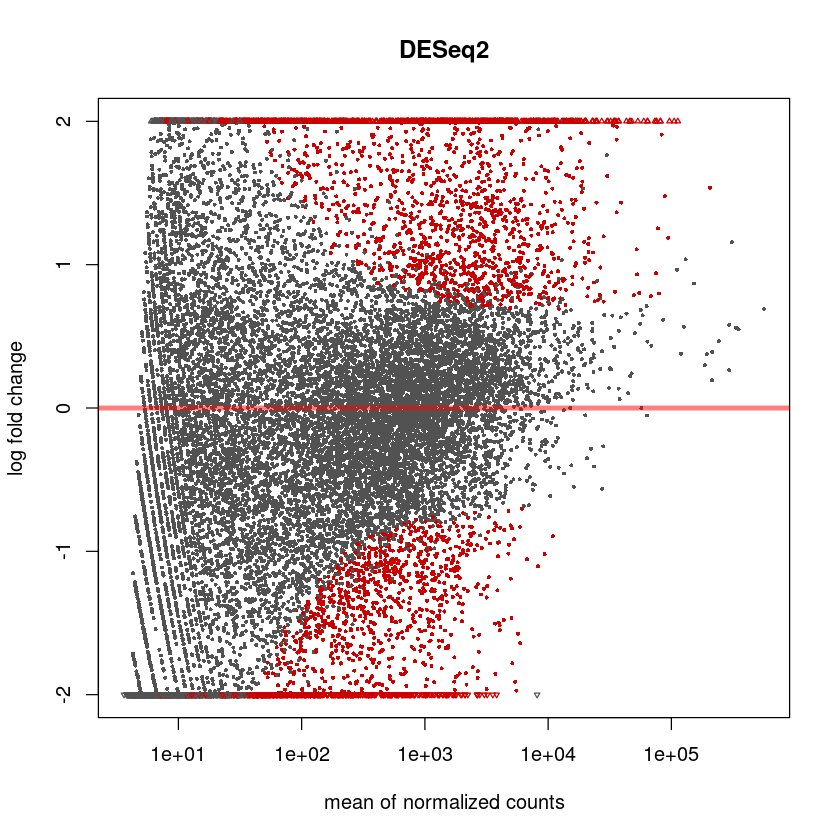

In [10]:
plotMA(res, main="DESeq2", ylim=c(-2,2))

We also have the option of adjusting our parameters of significance. Say, we wished to look at events with an padj value < 0.05. We could do the following:

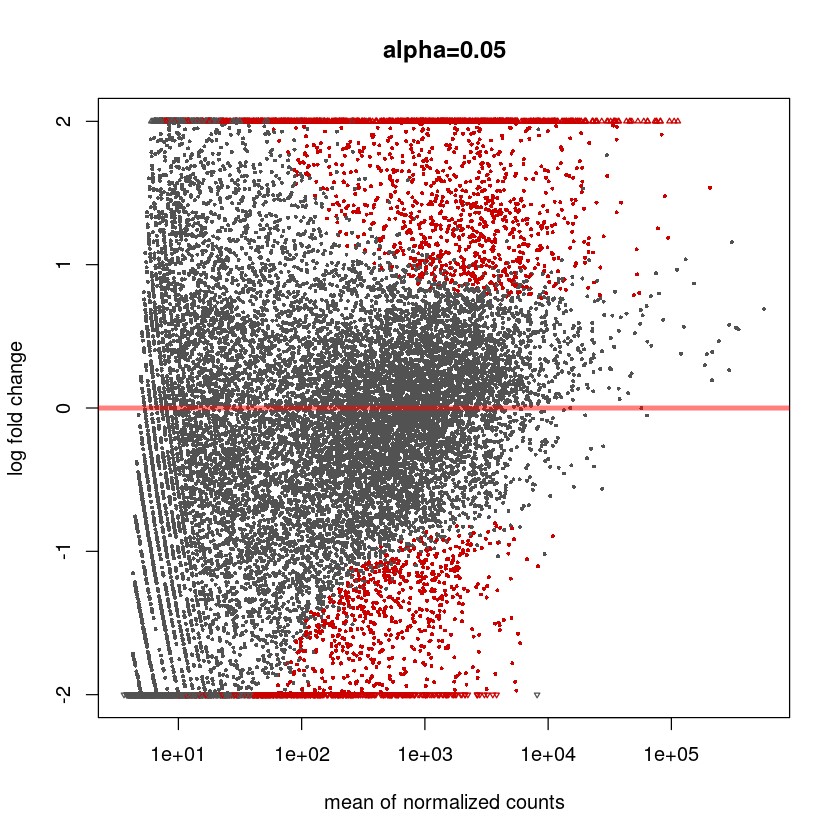

In [11]:
res05 <- results(dds, alpha=0.05)

plotMA(res05, main="alpha=0.05", ylim=c(-2,2))

Another useful quality metric is principal component analysis (PCA). This is a useful way of measuring sample-to-sample variance between and within experimental groups. This method transforms high dimensional data into a set of linearly uncorrelated variables that can then be represented on a 2D (or higher dimension) plane. Each principal component defines a degree of variance, the largest of which is represented in principal component 1 (PC1), then PC2, etc. For a more detailed intro, please check out the following [notebook](https://github.com/ryanmarina/BMS_bioinformatics_bootcamp_2018/blob/master/tutorials/Intro_to_PCA.ipynb) that Josh prepared.

$y
[1] "PC2: 7% variance"

attr(,"class")
[1] "labels"

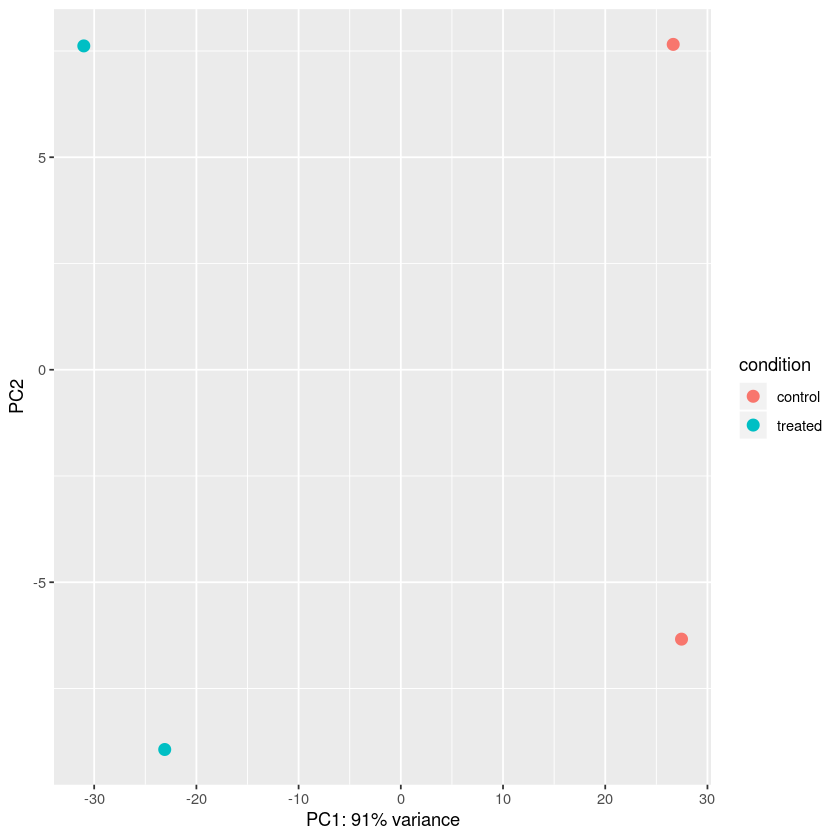

In [12]:
rld <- rlog(dds)
vsd <- varianceStabilizingTransformation(dds)

data <- plotPCA(rld, intgroup="condition", returnData=TRUE)
percentVar <- round(100 * attr(data, "percentVar"))
ggplot(data, aes(PC1, PC2, color=condition)) +
    geom_point(size=3) +
    xlab(paste0("PC1: ",percentVar[1],"% variance")) 
    ylab(paste0("PC2: ",percentVar[2],"% variance"))

Let's take our transformed data and 

Warning message in plot.window(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.window(...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_cols" is not a graphical parameter”

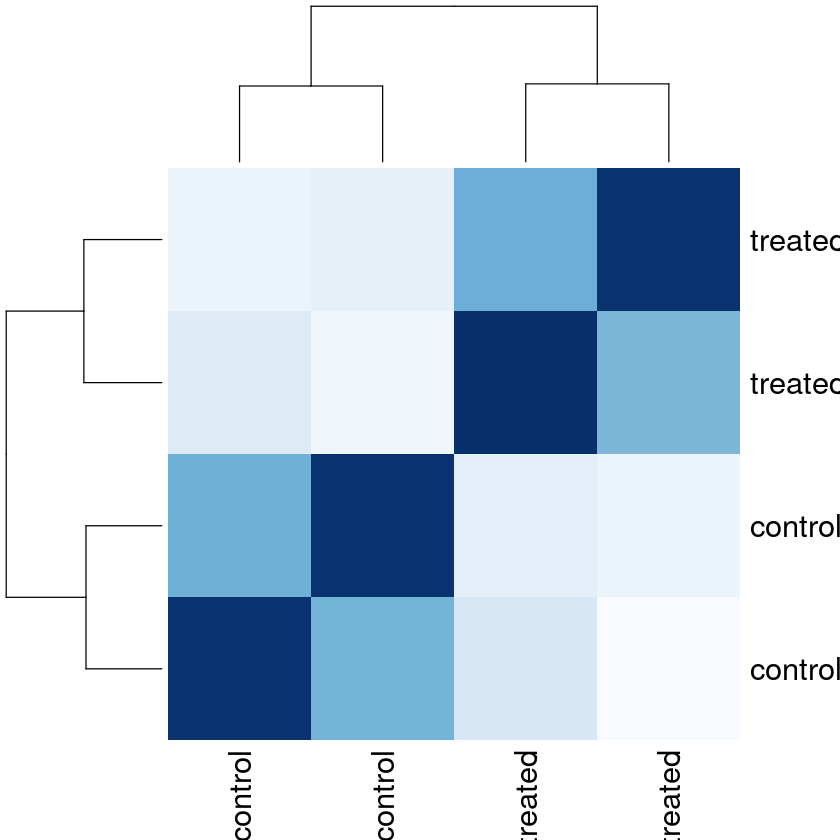

In [13]:
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(rld$condition)
colnames(sampleDistMatrix) <- paste(rld$condition)
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
heatmap(sampleDistMatrix,
clustering_distance_rows=sampleDists,
clustering_distance_cols=sampleDists,
col=colors)

We can also cluster variable genes in the same way that we clustered samples. To do so, we will take only the most variable genes in our dataset (let's say the top 200 variably expressed genes). We can then make a clustered heatmap based upon the fold change of our normalized read counts:

In [14]:
library( "gplots" )
library( "genefilter" )
topVarGenes <- head( order( rowVars( assay(rld) ), decreasing=TRUE ), 200 )


Attaching package: ‘gplots’

The following object is masked from ‘package:IRanges’:

    space

The following object is masked from ‘package:S4Vectors’:

    space

The following object is masked from ‘package:stats’:

    lowess


Attaching package: ‘genefilter’

The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars



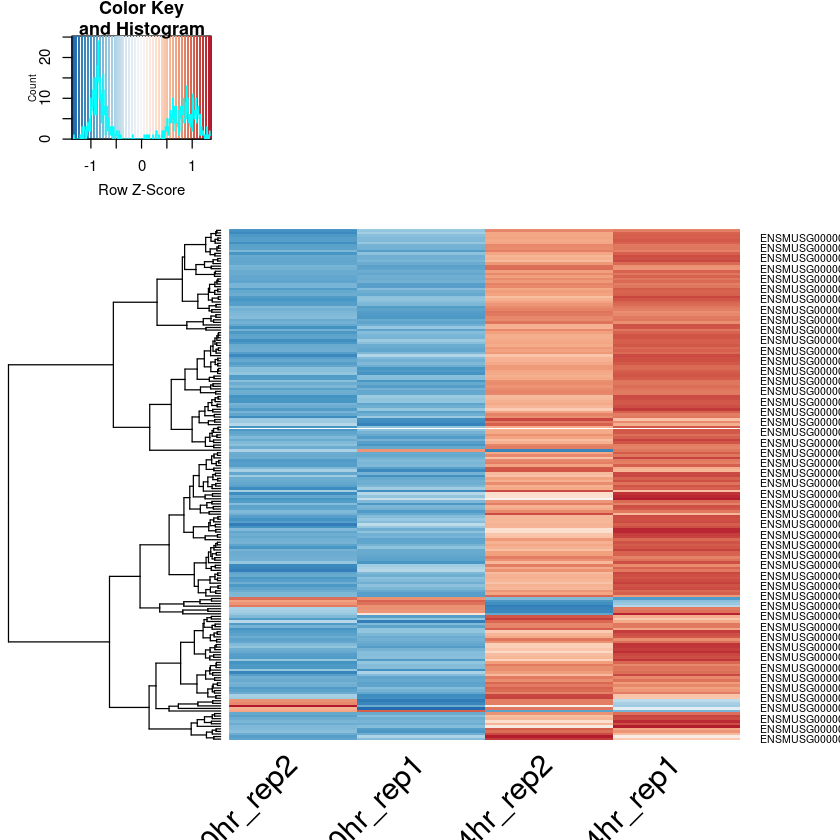

In [15]:
heatmap.2( assay(rld)[ topVarGenes, ], scale="row", 
     trace="none", dendrogram="row", 
     col = colorRampPalette( rev(brewer.pal(9, "RdBu")) )(255), 
          srtCol = 45)

Lastly, let's export our DESeq2 data table. From this, we can determine which genes are differentially expressed and what they mean with respect to our biological processes.

In [16]:
write.csv(as.data.frame(res), file="~/projects/analysis/deseq2/dendritic_differential_expression.csv")